TUGAS 2 PRAKTIKUM INFRASTRUKTUR DAN PLATFORM UNTUK SAINS DATA

Nama: Ika Wida Nuragustin

Nim: 2311110001

Kelas: S1SD-04-01

Lakukan preprocessing dan visualisasi pada data diabetes dengan ketentuan :
1. Imputasi missing value dengan mean, median, dan modus
2. Cek korelasi antar variabel dengan heatmap
3. Lakukan imbalance handling dengan undersampling
4. Lakukan scaling dengan robust scaler dan minmax

Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler

Load Data

In [ ]:
# Load the dataset
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,627.0,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,351.0,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,672.0,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,167.0,21.0,0
4,0.0,NaN,40.0,35.0,168.0,43.1,NaN,33.0,1


Dari hasil load data yang ditampilkan diatas dapat dilihat bahwa terdapat missing value disetiap variabelnya yang ditandai dengan 'NaN'.

1. Imputasi missing value dengan mean, median dan modus




In [ ]:
# Imputasi dengan Mean
# Mengganti nilai yang hilang dengan rata-rata dari setiap kolom
imputer_mean = SimpleImputer(strategy='mean')
data_mean = pd.DataFrame(imputer_mean.fit_transform(data), columns=data.columns)

# Imputasi dengan Median
# Mengganti nilai yang hilang dengan median dari setiap kolom
imputer_median = SimpleImputer(strategy='median')
data_median = pd.DataFrame(imputer_median.fit_transform(data), columns=data.columns)

# Imputasi dengan Modus
# Mengganti nilai yang hilang dengan modus dari setiap kolom
imputer_mode = SimpleImputer(strategy='most_frequent')
data_mode = pd.DataFrame(imputer_mode.fit_transform(data), columns=data.columns)

# Menampilkan hail imputasi untuk memastikan tidak ada lagi missing value
print("Imputasi dengan Mean:\n", data_mean.head())  # Hasil dengan mean
print("\nImputasi dengan Median:\n", data_median.head())  # Hasil dengan median
print("\nImputasi dengan Modus:\n", data_mode.head())  # Hasil dengan modus


Imputasi dengan Mean:
    Pregnancies     Glucose  BloodPressure  SkinThickness  Insulin       BMI  \
0          6.0  120.462481           72.0           35.0      0.0  31.99368   
1          1.0   85.000000           66.0           29.0      0.0  31.99368   
2          8.0  183.000000           64.0            0.0      0.0  23.30000   
3          1.0   89.000000           66.0           23.0     94.0  28.10000   
4          0.0  120.462481           40.0           35.0    168.0  43.10000   

   DiabetesPedigreeFunction        Age  Outcome  
0                627.000000  33.166124      1.0  
1                351.000000  31.000000      0.0  
2                672.000000  32.000000      1.0  
3                167.000000  21.000000      0.0  
4                352.519614  33.000000      1.0  

Imputasi dengan Median:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          6.0    116.0           72.0           35.0      0.0  32.15   
1          1.0     85.0       

Interpretasi:

Kode diatas digunakan untuk menangani missing value pada data menggunakan simpleImputer dengan imputasi mean, median dan modus. Berikut adalah penjelasan dari setiap imputasi:

1. Mean: Mengganti nilai yang hilang dengan rata-rata tiap kolom.
2. Median: Mengganti nilai yang hilang dengan nilai tengah dari tiap kolom.
3. Mode: Mengganti nilai yang hilang dengan nilai yang paling sering muncul.

2. Cek korelasi antar variabel dengan heatmap

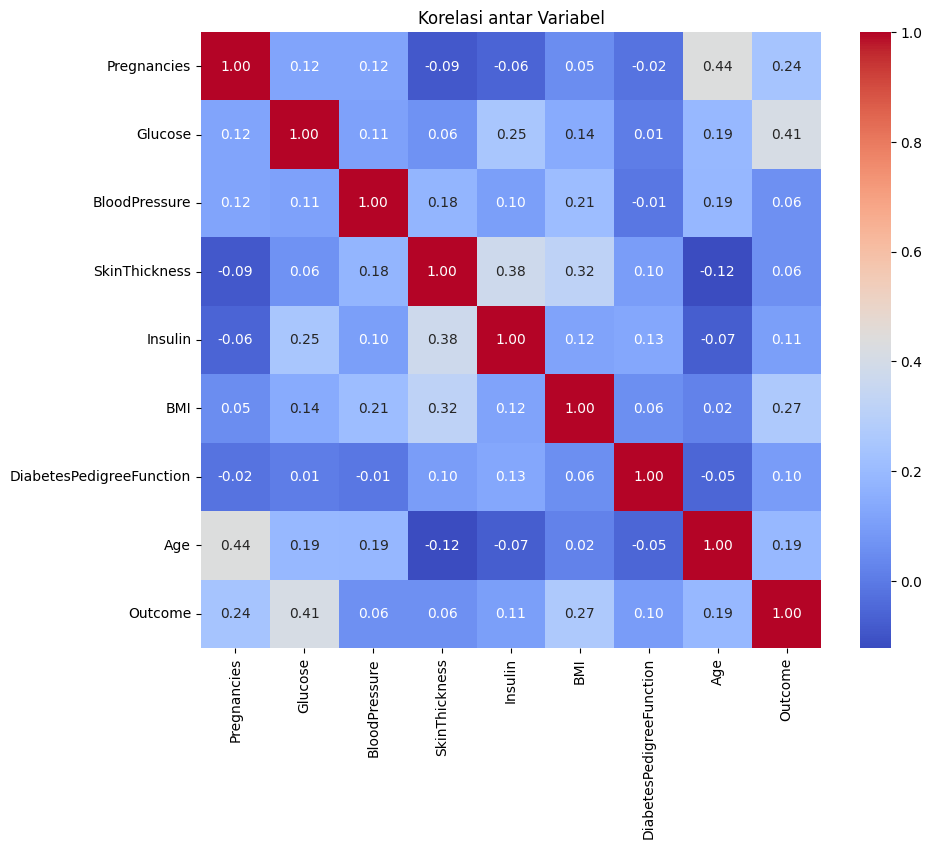

In [ ]:
# Menghitung korelasi antar variabel menggunakan data yang telah di-imputasi
corr_matrix = data_mean.corr()

# Visualisasi korelasi menggunakan heatmap
plt.figure(figsize=(10, 8))  # Mengatur ukuran heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')  # Menggunakan palet warna coolwarm
plt.title('Korelasi antar Variabel')  # Judul heatmap
plt.show()

Interpretasi:

kode diatas digunakan untuk menghitung matriks korelasi untuk melihat hubungan antara setiap variabel dalam dataset. Korelasi menunjukkan seberapa erat hubungan antara dua variabel:

1. Korelasi positif mendekati +1 berarti kedua variabel bergerak searah.
2. Korelasi negatif mendekati -1 berarti kedua variabel bergerak berlawanan arah.
3. Korelasi mendekati 0 menunjukkan hubungan yang lemah atau tidak ada hubungan.

Keterangan untuk Heatmap:

1. Warna panas (merah) menunjukkan korelasi positif yang kuat.
2. Warna dingin (biru) menunjukkan korelasi negatif yang kuat.

Angka di setiap sel menunjukkan nilai korelasi yang tepat, membantu dalam mengidentifikasi hubungan mana yang kuat atau lemah di antara variabel.

3. Lakukan imbalance handling dengan undersampling

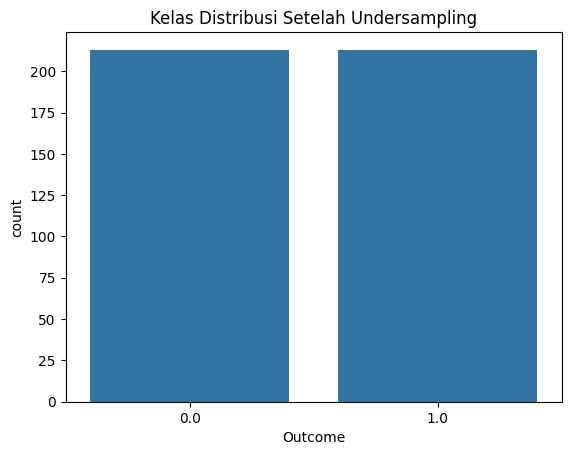

Jumlah data setelah undersampling:
Outcome
0.0    213
1.0    213
Name: count, dtype: int64


In [13]:
# Memisahkan fitur (X) dan target (y) dari data yang sudah diimputasi
X = data_mean.drop(columns='Outcome')  # Fitur
y = data_mean['Outcome']  # Target

# Split data ke dalam training dan test set (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melakukan undersampling untuk mengatasi imbalance data
rus = RandomUnderSampler(random_state=42)  # Random undersampling
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)  # Mengambil data yang sudah di-undersample

# Visualisasi distribusi kelas setelah undersampling
sns.countplot(x=y_resampled)  # Menampilkan distribusi kelas
plt.title('Kelas Distribusi Setelah Undersampling')  # Judul plot
plt.show()

# Melihat jumlah data setelah undersampling
print("Jumlah data setelah undersampling:")
print(pd.Series(y_resampled).value_counts())

Interpretasi:

Kode diatas digunakan untuk menangani masalah class imbalance pada variabel target. Dengan menggunakan RandomUnderSampler, dapat mengurangi jumlah sampel dari kelas mayoritas sehingga distribusi antar kelas menjadi seimbang. Meskipun undersampling mengurangi jumlah data, hal ini membantu meningkatkan akurasi prediksi pada kelas minoritas.

Setelah dilakukan undersampling, selanjutnya adalah memvisualisasikan distribusi kelas yang dihasilkan. Tujuan visualisasi ini adalah untuk memastikan bahwa kelas-kelas sudah seimbang setelah proses undersampling.

4. Lakukan scaling dengan robust scaler dan minmax

In [ ]:
# RobustScaler: Scaling yang tahan terhadap outliers dengan menggunakan median dan IQR
scaler_robust = RobustScaler()
X_robust_scaled = pd.DataFrame(scaler_robust.fit_transform(X_resampled), columns=X_resampled.columns)

# MinMaxScaler: Scaling yang merubah skala data antara 0 dan 1
scaler_minmax = MinMaxScaler()
X_minmax_scaled = pd.DataFrame(scaler_minmax.fit_transform(X_resampled), columns=X_resampled.columns)

# Menampilkan hasil scaling
print("Data setelah Robust Scaling:\n", X_robust_scaled.head())  # Data setelah robust scaling
print("\nData setelah MinMax Scaling:\n", X_minmax_scaled.head())  # Data setelah MinMax scaling

Data setelah Robust Scaling:
    Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.360637  0.000000       0.000000        0.62500  0.000000  1.609310   
1    -0.760637  0.000000      -5.746607       -0.68750  0.000000  0.000000   
2    -0.360637 -0.778308       0.586726       -0.12500 -0.103604  0.000000   
3    -0.160637 -0.631249       0.920060       -0.34375 -0.122652 -2.551494   
4    -0.760637 -0.454779      -0.079940        0.00000 -0.732176 -2.410790   

   DiabetesPedigreeFunction       Age  
0                  0.000870 -0.718912  
1                 -0.332529 -0.875774  
2                  0.994104 -0.797343  
3                 -0.228676 -0.248323  
4                 -0.389480 -0.875774  

Data setelah MinMax Scaling:
    Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.117647  0.605339       0.626903       0.666667  0.141581  0.596125   
1     0.000000  0.605339       0.000000       0.000000  0.141581  0.476806

Interpretasi:

Kode di atas digunakan untuk melakukan normalisasi skala pada dataset dengan menerapkan dua metode scaling pada data, yaitu RobustScaler dan MinMaxScaler, untuk menyesuaikan skala fitur. RobustScaler digunakan untuk mengurangi dampak outliers dalam dataset dengan menggunakan median dan interquartile range (IQR) untuk scaling, sehingga hasilnya lebih tahan terhadap outliers. Data hasil scaling ini disimpan dalam `X_robust_scaled`. Sementara itu, MinMaxScaler digunakan untuk merubah skala setiap fitur ke rentang antara 0 dan 1, di mana setiap nilai dalam dataset disesuaikan berdasarkan rentang minimum dan maksimum dari fitur tersebut. Data hasil scaling dengan MinMaxScaler disimpan dalam `X_minmax_scaled`. Kode terakhir menampilkan lima baris pertama dari hasil scaling untuk memverifikasi bahwa kedua metode telah diterapkan dengan benar.